# Lab 02 - Modeling Practice

This tutorial was adapted from [Neuromatch Academy](https://github.com/NeuromatchAcademy/course-content) tutorials, which were created by Matt Laporte, Byron Galbraith, Konrad Kording, Pierre-Étienne Fiquet, Anqi Wu, Alex Hyafil with help from Byron Galbraith, and reviewed by Lina Teichmann, Saeed Salehi, Patrick Mineault, Ella Batty, Dalin Guo, Aishwarya Balwani, Madineh Sarvestani, Maryam Vaziri-Pashkam, Michael Waskom.

## Describing Data
In this first section, we will use Python to describe data. To understand what our data look like, we will visualize it in different ways.

### Setup

Python requires you to explictly "import" libraries before their functions are available to use. We will always specify our imports at the beginning of each notebook or script.

In [1]:
from scipy import stats
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Getting to know your data
Here, we will load a dataset as a `pandas.DataFrame`, and investigate its attributes. We will see `N` rows for each subject, and `M` columns for each variable.

In [2]:
# data = pd.read_csv('_data/wk02-01.csv')

In [3]:
# type(data)

In [4]:
# print(data.values.shape) # N x M

In [5]:
# data.head()

### Plotting your data
Now, we will plot the distribution of one variable in our dataset (reaction time).

In [6]:
# plt.hist(data['reaction_times'], bins=50)
# plt.xlabel("Reactions Times")
# plt.ylabel("Number of Subjects")

Let's see what percentage of subjects have a below-average reaction time (RT):

In [7]:
# mean_rt = np.mean(data['reaction_times'])
# frac_below_mean = (data['reaction_times'] < mean_rt).mean()
# print(f"{frac_below_mean:2.1%} of subjects are below the mean")

We can also see this by adding the average RT to the histogram plot:

In [8]:
# plt.hist(data['reaction_times'], bins=50)
# plt.xlabel("Reactions Times")
# plt.ylabel("Number of Subjects")

# plt.axvline(mean_rt, color="orange", label="Mean RT")
# plt.legend()

### Comparing mean and median
Would adding the median RT tell us more information?

In [9]:
# To complete the exercise, fill in the missing parts (...) and uncomment the code

# median_rt = ...  # Hint: Try the function np.median

# plt.hist(..., bins=50)
# plt.xlabel("Reactions Times")
# plt.ylabel("Number of Subjects")

# plt.axvline(..., color="limegreen", label="Median RT")
# plt.axvline(mean_rt, color="orange", label="Mean RT")
# plt.legend()

## Model Simulations
Simulations are great ways to test models. By creating a simple synthetic dataset, we will know the true underlying model which allows us to see how our estimation efforts compare in uncovering the real model.

Below, we will simulate a linear relationship between two variables `x` and `y`, and then we will add some "noise" to those data.

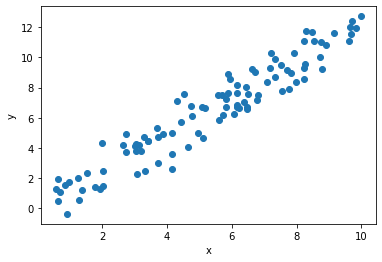

In [10]:
# setting a fixed seed to our random number generator ensures we will always
# get the same psuedorandom number sequence
np.random.seed(2021)

# Let's set some parameters
beta = 1.2
n_subjects = 100

# Draw x and then calculate y
x = 10 * np.random.rand(n_subjects)  # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_subjects)  # sample from a standard normal distribution
y = beta * x + noise

# Plot the results
fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');

Now that we have our noisy dataset, we can try to estimate the underlying model that produced it. We use MSE to evaluate how successful a particular slope estimate $\hat{\beta}$ is for explaining the data, with the closer to 0 the MSE is, the better our estimate fits the data.

## Model Fitting: Least-Squares Regression

Now, we will fit our simulated data to a simple linear regression, using least squares optimization and Maximum Likelihood Estimation. We will use bootstrapping to build confidence intervals around the inferred linear model parameters. We'll finish our exploration of regression models by generalizing to multiple linear regression and polynomial regression. 

In this tutorial, we will learn how to fit simple linear models to data.
- Learn how to calculate the mean-squared error (MSE) 
- Explore how model parameters (slope) influence the MSE
- Learn how to find the optimal model parameter using least-squares optimization

**Linear least squares regression** is a great optimization procedure that we are going to use for data fitting. 

Suppose you have a set of measurements, $y_{n}$ (the "dependent" variable) obtained for different input values, $x_{n}$ (the "independent" or "explanatory" variable). Suppose we believe the measurements are proportional to the input values, but are corrupted by some (random) measurement errors, $\epsilon_{n}$, that is:

$$y_{n}= \beta x_{n}+\epsilon_{n}$$

for some unknown slope parameter $\beta.$ The least squares regression problem uses **mean squared error (MSE)** as its objective function, it aims to find the value of the parameter $\beta$ by minimizing the average of squared errors:

\begin{align}
\min _{\beta} \frac{1}{N}\sum_{n=1}^{N}\left(y_{n}-\beta x_{n}\right)^{2}
\end{align}

We will now explore how MSE is used in fitting a linear regression model to data. 

First we will generate some noisy samples $x$ from [0, 10) along the line $y = 1.2x$ as our dataset we wish to fit a model to.

### Computing MSE

In this exercise you will implement a method to compute the mean squared error for a set of inputs $x$, measurements $y$, and slope estimate $\hat{\beta}$. We will then compute and print the mean squared error for 3 different choices of beta.

In [11]:
def mse(x, y, beta_hat):
  """Compute the mean squared error

  Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    beta_hat (float): An estimate of the slope parameter

  Returns:
    float: The mean squared error of the data with the estimated parameter.
  """
  
  # Compute the estimated y
  y_hat = beta_hat * x

  # Compute mean squared error
  mse = np.mean(y - y_hat)

  return mse

# Uncomment below to test your function
beta_hats = [0.75, 1.0, 1.5]
# for beta_hat in beta_hats:
#   print(f"beta_hat of {beta_hat} has an MSE of {mse(x, y, beta_hat):.2f}")

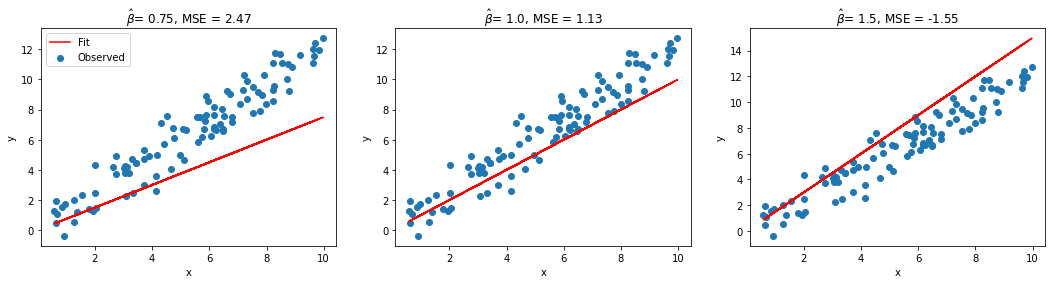

In [12]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 4))
for beta_hat, ax in zip(beta_hats, axes):

  # True data
  ax.scatter(x, y, label='Observed')  # our data scatter plot

  # Compute and plot predictions
  y_hat = beta_hat * x
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model

  ax.set(
      title= fr'$\hat{{\beta}}$= {beta_hat}, MSE = {mse(x, y, beta_hat):.2f}',
      xlabel='x',
      ylabel='y')

axes[0].legend()

### Interactive Demo
Using an interactive widget, we can easily see how changing our slope estimate changes our model fit. We display the **residuals**, the differences between observed and predicted data, as line segments between the data point (observed response) and the corresponding predicted response on the model fit line.

In [13]:
def plot_observed_vs_predicted(x, y, y_hat, beta_hat):
  """ Plot observed vs predicted data

  Args:
      x (ndarray): observed x values
  y (ndarray): observed y values
  y_hat (ndarray): predicted y values

  """
  fig, ax = plt.subplots()
  ax.scatter(x, y, label='Observed')  # our data scatter plot
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model
  # plot residuals
  ymin = np.minimum(y, y_hat)
  ymax = np.maximum(y, y_hat)
  ax.vlines(x, ymin, ymax, 'g', alpha=0.5, label='Residuals')
  ax.set(
      title=fr"$\hat{{\beta}}$ = {beta_hat:0.2f}, MSE = {mse(x, y, beta_hat):.2f}",
      xlabel='x',
      ylabel='y'
  )
  ax.legend()

In [14]:
# import ipywidgets as widgets       # interactive display
# %config InlineBackend.figure_format = 'retina'
# plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

# @widgets.interact(beta_hat=widgets.FloatSlider(1.2, min=0.0, max=2.0))
# def plot_data_estimate(beta_hat):
#   y_hat = beta_hat * x
#   plot_observed_vs_predicted(x, y, y_hat, beta_hat)

### Least-squares optimization

While the approach detailed above (computing MSE at various values of $\hat\beta$) quickly got us to a good estimate, it still relied on evaluating the MSE value across a grid of hand-specified values. If we didn't pick a good range to begin with, or with enough granularity, we might miss the best possible estimator. Let's go one step further, and instead of finding the minimum MSE from a set of candidate estimates, let's solve for it analytically.

We can do this by minimizing the cost function. Mean squared error is a convex objective function, therefore we can compute its minimum using calculus. Please see video or appendix for this derivation! After computing the minimum, we find that:

\begin{align}
\hat\beta = \frac{\vec{x}^\top \vec{y}}{\vec{x}^\top \vec{x}}
\end{align}

This is known as solving the normal equations. For different ways of obtaining the solution, see the notes on [Least Squares Optimization](https://www.cns.nyu.edu/~eero/NOTES/leastSquares.pdf) by Eero Simoncelli.

Next, we will write a function that find the optimal $\hat{\beta}$ value using the least squares optimization approach (the equation above) to solve MSE minimization. It shoud take arguments $x$ and $y$ and return the solution $\hat{\beta}$.

We will then use your function to compute $\hat{\beta}$ and plot the resulting prediction on top of the data.

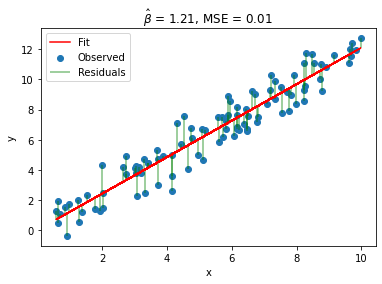

In [15]:
def solve_normal_eqn(x, y):
  """Solve the normal equations to produce the value of beta_hat that minimizes
    MSE.

    Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.

  Returns:
    float: the value for beta_hat arrived from minimizing MSE
  """

  # Compute beta_hat analytically
  beta_hat = (x.T @ y) / (x.T @ x)

  return beta_hat

# Uncomment below to test your function
beta_hat = solve_normal_eqn(x, y)
y_hat = beta_hat * x
plot_observed_vs_predicted(x, y, y_hat, beta_hat)

- Linear least squares regression is an optimization procedure that can be used for data fitting:
    - Task: predict a value for $y$ given $x$
    - Performance measure: $\textrm{MSE}$
    - Procedure: minimize $\textrm{MSE}$ by solving the normal equations
- **Key point**: We fit the model by defining an *objective function* and minimizing it. 
- **Note**: In this case, there is an *analytical* solution to the minimization problem and in practice, this solution can be computed using *linear algebra*. This is *extremely* powerful and forms the basis for much of numerical computation throughout the sciences.

## Model Fitting: Linear regression with MLE

In the previous tutorial we made the assumption that the data was drawn from a linear relationship with noise added, and found an effective approach for estimating model parameters based on minimizing the mean squared error.

In that case we treated the noise as simply a nuisance, but what if we factored it directly into our model?

Recall our linear model:

\begin{align}
y = \beta x + \epsilon.
\end{align}

The noise component $\epsilon$ is often modeled as a random variable drawn from a Gaussian distribution (also called the normal distribution).

The Gaussian distribution is described by its [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) (pdf)
\begin{align}
\mathcal{N}(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2\sigma^2}(x-\mu)^2}
\end{align}

and is dependent on two parameters: the mean $\mu$ and the variance $\sigma^2$. We often consider the noise signal to be Gaussian "white noise", with zero mean and unit variance:

\begin{align}
\epsilon \sim \mathcal{N}(0, 1).
\end{align}

We can plot the density of $p(y|x,\theta=1.2)$ and see how $p(y)$ changes for different values of $x$.

In [16]:
def plot_density_image(x, y, beta, sigma=1, ax=None):
  """ Plots probability distribution of y given x, beta, and sigma

  Args:

    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    theta (float): Slope parameter
    sigma (float): standard deviation of Gaussian noise

  """

  # plot the probability density of p(y|x,theta)
  if ax is None:
    fig, ax = plt.subplots()

  xmin, xmax = np.floor(np.min(x)), np.ceil(np.max(x))
  ymin, ymax = np.floor(np.min(y)), np.ceil(np.max(y))
  xx = np.linspace(xmin, xmax, 50)
  yy = np.linspace(ymin, ymax, 50)

  surface = np.zeros((len(yy), len(xx)))
  for i, x_i in enumerate(xx):
    surface[:, i] = stats.norm(beta * x_i, sigma).pdf(yy)

  ax.set(xlabel='x', ylabel='y')

  return ax.imshow(surface, origin='lower', aspect='auto', vmin=0, vmax=None,
            cmap=plt.get_cmap('Wistia'),
            extent=[xmin, xmax, ymin, ymax])

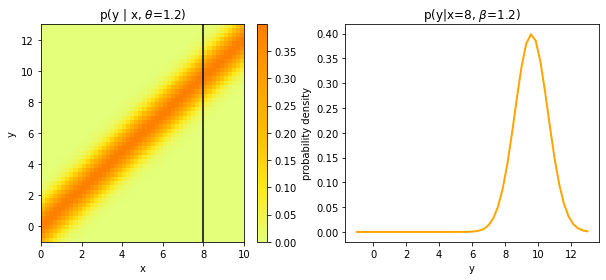

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

# Invokes helper function to generate density image plots from data and parameters
im = plot_density_image(x, y, 1.2, ax=ax1)
plt.colorbar(im, ax=ax1)
ax1.axvline(8, color='k')
ax1.set(title=r'p(y | x, $\theta$=1.2)')

# Plot pdf for given x
ylim = ax1.get_ylim()
yy = np.linspace(ylim[0], ylim[1], 50)
ax2.plot(yy, stats.norm(beta * 8, 1).pdf(yy), color='orange', linewidth=2)
ax2.set(
    title=r'p(y|x=8, $\beta$=1.2)',
    xlabel='y',
    ylabel='probability density');

In this exercise you will implement the likelihood function $\mathcal{L}(\beta|x,y)$ for our linear model where $\sigma = 1$.

After implementing this function, we can produce probabilities that our estimate $\hat{\beta}$ generated the provided observations. We will try with one of the samples from our dataset.

TIP: Use `np.exp` and `np.sqrt` for the exponential and square root functions, respectively.

In [18]:
def likelihood(theta_hat, x, y):
  """The likelihood function for a linear model with noise sampled from a
    Gaussian distribution with zero mean and unit variance.

  Args:
    theta_hat (float): An estimate of the slope parameter.
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.

  Returns:
    ndarray: the likelihood values for the theta_hat estimate
  """
  sigma = 1
  
  # Compute Gaussian likelihood
  pdf = 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-(y - theta_hat * x)**2 / (2 * sigma**2))

  return pdf

print(likelihood(1.0, x[1], y[1]))

0.1623808325143324


When dealing with a set of data points, as we are with our dataset, we are concerned with their joint probability -- the likelihood that all data points are explained by our parameterization. Since we have assumed that the noise affects each output independently, we can factorize the likelihood, and write:

\begin{align}
\mathcal{L}(\beta|X,Y) = \prod_{i=1}^N \mathcal{L}(\beta|x_i,y_i),
\end{align}

where we have $N$ data points $X = \{x_1,...,x_N\}$ and $Y = \{y_1,...,y_N\}$.

In practice, such a product can be numerically unstable. Indeed multiplying small values together can lead to [underflow](https://en.wikipedia.org/wiki/Arithmetic_underflow), the situation in which the digital representation of floating point number reaches its limit. This problem can be circumvented by taking the logarithm of the likelihood because the logarithm transforms products into sums:

\begin{align}
\operatorname{log}\mathcal{L}(\beta|X,Y) = \sum_{i=1}^N \operatorname{log}\mathcal{L}(\beta|x_i,y_i)
\end{align}

We can take the sum of the log of the output of our `likelihood` method applied to the full dataset to get a better idea of how different $\hat\beta$ compare. We can also plot the different distribution densities over our dataset and see how they line up qualitatively.

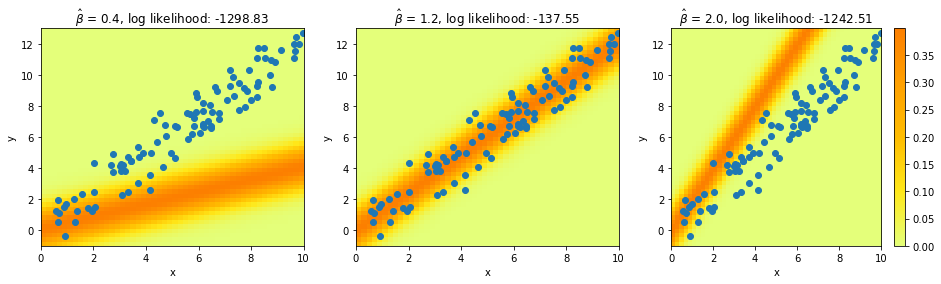

In [19]:
beta_hats = [0.4, 1.2, 2.0]
fig, axes = plt.subplots(ncols=3, figsize=(16, 4))
for beta_hat, ax in zip(beta_hats, axes):
  ll = np.sum(np.log(likelihood(beta_hat, x, y)))  # log likelihood
  im = plot_density_image(x, y, beta_hat, ax=ax)
  ax.scatter(x, y)
  ax.set(title=fr'$\hat{{\beta}}$ = {beta_hat}, log likelihood: {ll:.2f}')
plt.colorbar(im, ax=ax);

### Finding the Maximum Likelihood Estimator

We want to find the parameter value $\hat\beta$ that makes our data set most likely:

\begin{align}
\hat{\beta}_{\textrm{MLE}} = \underset{\beta}{\operatorname{argmax}} \mathcal{L}(\beta|X,Y) 
\end{align}

We discussed how taking the logarithm of the likelihood helps with numerical stability, the good thing is that it does so without changing the parameter value that maximizes the likelihood. Indeed, the $\textrm{log}()$ function is *monotonically increasing*, which means that it preserves the order of its inputs. So we have:

\begin{align}
\hat{\beta}_{\textrm{MLE}} = \underset{\beta}{\operatorname{argmax}} \sum_{i=1}^m \textrm{log} \mathcal{L}(\beta|x_i,y_i) 
\end{align}

Now substituting our specific likelihood function and taking its logarithm, we get:
\begin{align}
\hat{\beta}_{\textrm{MLE}} = \underset{\beta}{\operatorname{argmax}} [-\frac{N}{2} \operatorname{log} 2\pi\sigma^2 - \frac{1}{2\sigma^2}\sum_{i=1}^N (y_i-\beta x_i)^2].
\end{align}

Note that maximizing the log likelihood is the same as minimizing the negative log likelihood (in practice optimization routines are developed to solve minimization not maximization problems). Because of the convexity of this objective function, we can take the derivative of our negative log likelihhood, set it to 0, and solve - just like our solution to minimizing MSE.

\begin{align}
\frac{\partial\operatorname{log}\mathcal{L}(\beta|x,y)}{\partial\beta}=\frac{1}{\sigma^2}\sum_{i=1}^N(y_i-\beta x_i)x_i = 0
\end{align}

This looks remarkably like the equation we had to solve for the optimal MSE estimator, and, in fact, we arrive to the exact same solution!

\begin{align}
\hat{\beta}_{\textrm{MLE}} = \hat{\beta}_{\textrm{MSE}} = \frac{\sum_{i=1}^N x_i y_i}{\sum_{i=1}^N x_i^2}
\end{align}

In [20]:
# Compute beta_hat_MLE
beta_hat_mle = (x @ y) / (x @ x)

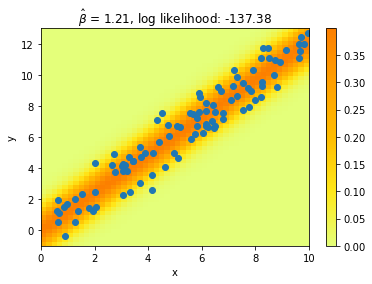

In [21]:
# Plot the resulting distribution density
fig, ax = plt.subplots()
ll = np.sum(np.log(likelihood(beta_hat_mle, x, y))) # log likelihood
im = plot_density_image(x, y, beta_hat_mle, ax=ax)
plt.colorbar(im, ax=ax);
ax.scatter(x, y)
ax.set(title=fr'$\hat{{\beta}}$ = {beta_hat_mle:.2f}, log likelihood: {ll:.2f}');

- Likelihood vs probability
    - $\mathcal{L}(\beta|x, y) = p(y|\beta, x)$
    - $p(y|\theta, x)$ -> "probability of observing the response $y$ given parameter $\beta$ and input $x$"
    - $\mathcal{L}(\theta|x, y)$ -> "likelihood model that parameters $\theta$ produced response $y$ from input $x$"
- Log-likelihood maximization
    - We take the $\textrm{log}$ of the likelihood function for computational convenience
    - The parameters $\beta$ that maximize $\textrm{log}\mathcal{L}(\beta|x, y)$ are the model parameters that maximize the probability of observing the data.
- **Key point**:
  - the log-likelihood is a flexible cost function, and is often used to find model parameters that best fit the data.

## Bootstrapping

[Bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) is a widely applicable method to assess confidence/uncertainty about estimated parameters, it was originally [proposed](https://projecteuclid.org/euclid.aos/1176344552) by [Bradley Efron](https://en.wikipedia.org/wiki/Bradley_Efron). The idea is to generate many new synthetic datasets from the initial true dataset by randomly sampling from it, then finding estimators for each one of these new datasets, and finally looking at the distribution of all these estimators to quantify our confidence.

Note that each new resampled datasets will be the same size as our original one, with the new data points sampled with replacement i.e. we can repeat the same data point multiple times. Also note that in practice we need a lot of resampled datasets, here we use 2000.

To explore this idea, we will start again with our noisy samples along the line $y_n = 1.2x_n + \epsilon_n$, but this time only use half the data points as last time (15 instead of 30).

### Resample Dataset with Replacement

In this exercise you will implement a method to resample a dataset with replacement. The method accepts $x$ and $y$ arrays. It should return a new set of $x'$ and $y'$ arrays that are created by randomly sampling from the originals.

We will then compare the original dataset to a resampled dataset.

TIP: The [numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) method would be useful here.

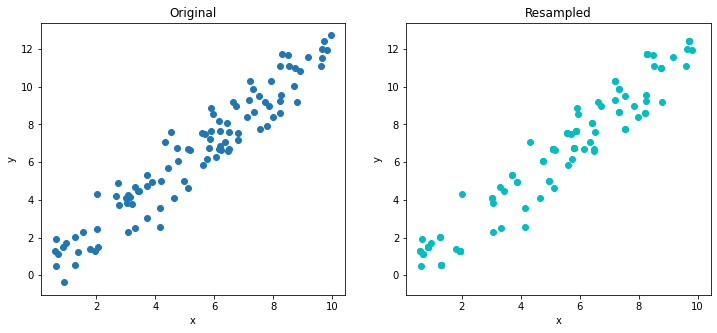

In [22]:
def resample_with_replacement(x, y):
  """Resample data points with replacement from the dataset of `x` inputs and
  `y` measurements.

  Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.

  Returns:
    ndarray, ndarray: The newly resampled `x` and `y` data points.
  """
  # Get array of indices for resampled points
  sample_idx = np.random.choice(len(x), size=len(x), replace=True)

  # Sample from x and y according to sample_idx
  x_ = x[sample_idx]
  y_ = y[sample_idx]

  return x_, y_

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(x, y)
ax1.set(title='Original', xlabel='x', ylabel='y')

# Uncomment below to test your function
x_, y_ = resample_with_replacement(x, y)
ax2.scatter(x_, y_, color='c')

ax2.set(title='Resampled', xlabel='x', ylabel='y',
        xlim=ax1.get_xlim(), ylim=ax1.get_ylim());

In the resampled plot on the right, the actual number of points is the same, but some have been repeated so they only display once.

Now that we have a way to resample the data, we can use that in the full bootstrapping process.

### Bootstrap Estimates

In this exercise you will implement a method to run the bootstrap process of generating a set of $\hat\beta$ values from a dataset of $x$ inputs and $y$ measurements. You should use `resample_with_replacement` here, and you may also invoke helper function `solve_normal_eqn` to produce the MSE-based estimator.

We will then use this function to look at the `beta_hat` from different samples.

In [23]:
def bootstrap_estimates(x, y, n=500):
  """Generate a set of theta_hat estimates using the bootstrap method.

  Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    n (int): The number of estimates to compute

  Returns:
    ndarray: An array of estimated parameters with size (n,)
  """
  beta_hats = np.zeros(n)

  # Loop over number of estimates
  for i in range(n):

    # Resample x and y
    x_, y_ = resample_with_replacement(x, y)

    # Compute theta_hat for this sample
    beta_hats[i] = solve_normal_eqn(x_, y_)

  return beta_hats

np.random.seed(2021)  # set random seed for checking solutions

# Uncomment below to test function
beta_hats = bootstrap_estimates(x, y, n=2000)
print(beta_hats[0:5])

[1.20454558 1.22652693 1.21429211 1.22514734 1.2125787 ]


Now that we have our bootstrap estimates, we can visualize all the potential models (models computed with different resampling) together to see how distributed they are.

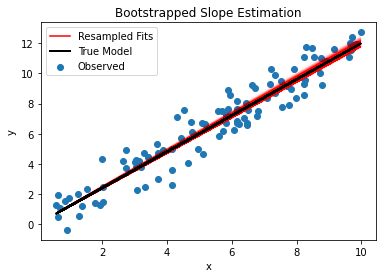

In [24]:
fig, ax = plt.subplots()

# For each theta_hat, plot model
beta_hats = bootstrap_estimates(x, y, n=500)
for i, beta_hat in enumerate(beta_hats):
  y_hat = beta_hat * x
  ax.plot(x, y_hat, c='r', alpha=0.01, label='Resampled Fits' if i==0 else '')

# Plot observed data
ax.scatter(x, y, label='Observed')

# Plot true fit data
y_true = beta * x
ax.plot(x, y_true, 'black', linewidth=2, label='True Model')

ax.set(
  title='Bootstrapped Slope Estimation',
  xlabel='x',
  ylabel='y'
)

# Change legend line alpha property
handles, labels = ax.get_legend_handles_labels()
handles[0].set_alpha(1)

ax.legend()

### Confidence Intervals

Let us now quantify how uncertain our estimated slope is. We do so by computing [confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval) (CIs) from our bootstrapped estimates. The most direct approach is to compute percentiles from the empirical distribution of bootstrapped estimates. Note that this is widely applicable as we are not assuming that this empirical distribution is Gaussian.

mean = 1.21, std = 0.02


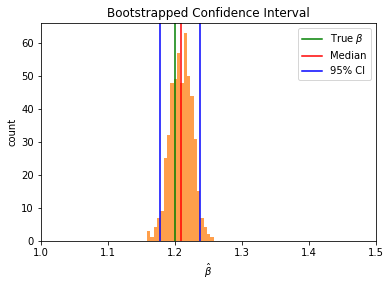

In [25]:
beta_hats = bootstrap_estimates(x, y, n=500)
print(f"mean = {np.mean(beta_hats):.2f}, std = {np.std(beta_hats):.2f}")

fig, ax = plt.subplots()
ax.hist(beta_hats, bins=20, facecolor='C1', alpha=0.75)
ax.axvline(beta, c='g', label=r'True $\beta$')
ax.axvline(np.percentile(beta_hats, 50), color='r', label='Median')
ax.axvline(np.percentile(beta_hats, 2.5), color='b', label='95% CI')
ax.axvline(np.percentile(beta_hats, 97.5), color='b')
ax.legend()

ax.set(
    title='Bootstrapped Confidence Interval',
    xlabel=r'$\hat{{\beta}}$',
    ylabel='count',
    xlim=[1.0, 1.5]
);

Looking at the distribution of bootstrapped $\hat{\beta}$ values, we see that the true $\beta$ falls well within the 95% confidence interval, which is reassuring. We also see that the value $\beta = 1$ does not fall within the confidence interval. From this, we would reject the hypothesis that the slope was 1.

## Multiple Linear Regression
Now that we have considered the univariate case and how to produce confidence intervals for our estimator, we turn to the general linear regression case, where we can have more than one regressor, or feature, in our input.

Recall that our original univariate linear model was given as

\begin{align}
y = \beta x + \epsilon
\end{align}

where $\beta$ is the slope and $\epsilon$ some noise. We can easily extend this to the multivariate scenario by adding another parameter for each additional feature

\begin{align}
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... +\beta_d x_d + \epsilon
\end{align}

where $\beta_0$ is the intercept and $d$ is the number of features (it is also the dimensionality of our input).

We can condense this succinctly using vector notation for a single data point

\begin{align}
y_i = \boldsymbol{\beta}^{\top}\mathbf{x}_i + \epsilon
\end{align}

and fully in matrix form

\begin{align}
\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \mathbf{\epsilon}
\end{align}

where $\mathbf{y}$ is a vector of measurements, $\mathbf{X}$ is a matrix containing the feature values (columns) for each input sample (rows), and $\boldsymbol{\theta}$ is our parameter vector.

This matrix $\mathbf{X}$ is often referred to as the "[design matrix](https://en.wikipedia.org/wiki/Design_matrix)".

For now, we will focus on the two-dimensional case ($d=2$), which allows us to easily visualize our results. 

In this case our model can be writen as:

\begin{align}
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon
\end{align}

or in matrix form where

\begin{align}
\mathbf{X} = 
\begin{bmatrix}
1 & x_{1,1} & x_{1,2} \\
1 & x_{2,1} & x_{2,2} \\
\vdots & \vdots & \vdots \\
1 & x_{n,1} & x_{n,2}
\end{bmatrix}, 
\boldsymbol{\beta} =
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\end{bmatrix}
\end{align}

For our actual exploration dataset we shall set $\boldsymbol{\beta}=[0, -2, -3]$ and draw $N=40$ noisy samples from $x \in [-2,2)$. Note that setting the value of $\beta_0 = 0$ effectively ignores the offset term.

c:\users\shawn\.conda\envs\qe-mini-example\lib\site-packages\ipykernel_launcher.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


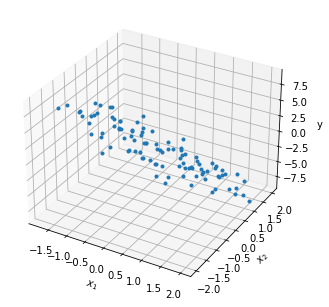

In [26]:
# Set random seed for reproducibility
np.random.seed(2021)

# Set parameters
beta = [0, -2, -3]
n_samples = 40

# Draw x and calculate y
n_regressors = len(beta)
x0 = np.ones((n_subjects, 1))
x1 = np.random.uniform(-2, 2, (n_subjects, 1))
x2 = np.random.uniform(-2, 2, (n_subjects, 1))
X = np.hstack((x0, x1, x2))
noise = np.random.randn(n_subjects)
y = X @ beta + noise

from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(X[:,1], X[:,2], y, '.')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='y'
)
plt.tight_layout()

Now that we have our dataset, we want to find an optimal vector of paramters $\boldsymbol{\hat\beta}$. Recall our analytic solution to minimizing MSE for a single regressor:

\begin{align}
\hat\beta = \frac{\sum_{i=1}^N x_i y_i}{\sum_{i=1}^N x_i^2}.
\end{align}

The same holds true for the multiple regressor case, only now expressed in matrix form

\begin{align}
\boldsymbol{\hat\beta} = (\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top\mathbf{y}.
\end{align}

This is called the [ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) (OLS) estimator.

In [27]:
def ordinary_least_squares(X, y):
  """Ordinary least squares estimator for linear regression.

  Args:
    X (ndarray): design matrix of shape (n_samples, n_regressors)
    y (ndarray): vector of measurements of shape (n_samples)

  Returns:
    ndarray: estimated parameter values of shape (n_regressors)
  """

  # Compute theta_hat using OLS
  beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

  return beta_hat

# Compute beta_hat
beta_hat = ordinary_least_squares(X, y)
print(f"beta_hat = {beta_hat}")

# Compute MSE
y_hat = X @ beta_hat
print(f"MSE = {np.mean((y - y_hat)**2):.2f}")

beta_hat = [ 0.02531807 -1.9575428  -3.14347711]
MSE = 0.94


Finally, the following code will plot a geometric visualization of the data points (blue) and fitted plane. 

c:\users\shawn\.conda\envs\qe-mini-example\lib\site-packages\ipykernel_launcher.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


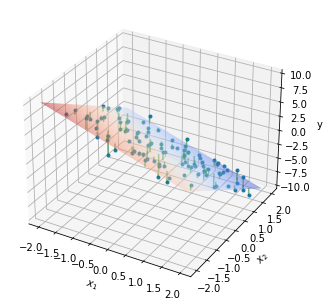

In [28]:
beta_hat = ordinary_least_squares(X, y)
xx, yy = np.mgrid[-2:2:50j, -2:2:50j]
y_hat_grid = np.array([xx.flatten(), yy.flatten()]).T @ beta_hat[1:]
y_hat_grid = y_hat_grid.reshape((50, 50))

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(X[:, 1], X[:, 2], y, '.')
ax.plot_surface(xx, yy, y_hat_grid, linewidth=0, alpha=0.5, color='C1',
                cmap=plt.get_cmap('coolwarm'))

for i in range(len(X)):
  ax.plot((X[i, 1], X[i, 1]),
          (X[i, 2], X[i, 2]),
          (y[i], y_hat[i]),
          'g-', alpha=.5)

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='y'
)
plt.tight_layout()

## Polynomial Regression

So far today, you learned how to predict outputs from inputs by fitting a linear regression model. We can now model all sort of relationships!  

One potential problem with this approach is the simplicity of the model. Linear regression, as the name implies, can only capture a linear relationship between the inputs and outputs. Put another way, the predicted outputs are only a weighted sum of the inputs. What if there are more complicated computations happening? Luckily, many more complex models exist. One model that is still very simple to fit and understand, but captures more complex relationships, is **polynomial regression**, an extension of linear regression.

Since polynomial regression is an extension of linear regression, everything you learned so far will come in handy now! The goal is the same: we want to predict the dependent variable $y_{n}$ given the input values $x_{n}$. The key change is the type of relationship between inputs and outputs that the model can capture. 

Linear regression models predict the outputs as a weighted sum of the inputs:

$$y_{n}= \beta_0 + \beta x_{n} + \epsilon_{n}$$

With polynomial regression, we model the outputs as a polynomial equation based on the inputs. For example, we can model the outputs as:

$$y_{n}= \beta_0 + \beta_1 x_{n} + \beta_2 x_{n}^2 + \beta_3 x_{n}^3 + \epsilon_{n}$$

We can change how complex a polynomial is fit by changing the order of the polynomial. The order of a polynomial refers to the highest power in the polynomial. The equation above is a third order polynomial because the highest value x is raised to is 3. We could add another term ($+ \beta_4 x_{n}^4$) to model an order 4 polynomial and so on.

First, we will simulate some data to practice fitting polynomial regression models. We will generate random inputs $x$ and then compute y according to $y = x^2 - x - 2 $, with some extra noise both in the input and the output to make the model fitting exercise closer to a real life situation.

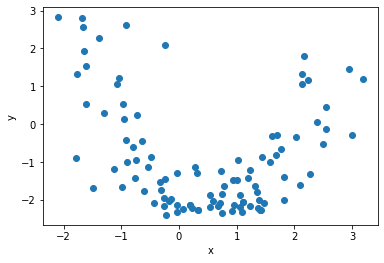

In [29]:
# setting a fixed seed to our random number generator ensures we will always
# get the same psuedorandom number sequence
np.random.seed(2021)
n_subjects = 100
x = np.random.uniform(-2, 2.5, n_subjects)  # inputs uniformly sampled from [-2, 2.5)

y =  x**2 - x - 2   # computing the outputs

output_noise = 1/8 * np.random.randn(n_subjects)
y += output_noise  # adding some output noise

input_noise = 1/2 * np.random.randn(n_subjects)
x += input_noise  # adding some input noise

fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');

### Design matrix for polynomial regression

Now we have the basic idea of polynomial regression and some noisy data, let's begin! The key difference between fitting a linear regression model and a polynomial regression model lies in how we structure the input variables.  

For linear regression, we used $X = x$ as the input data. To add a constant bias (a y-intercept in a 2-D plot), we use $X = \big[ \boldsymbol 1, x \big]$, where $\boldsymbol 1$ is a column of ones.  When fitting, we learn a weight for each column of this matrix. So we learn a weight that multiples with column 1 - in this case that column is all ones so we gain the bias parameter ($+ \theta_0$). We also learn a weight for every column, or every feature of x, as we learned in Section 1.

This matrix $X$ that we use for our inputs is known as a **design matrix**. We want to create our design matrix so we learn weights for $x^2, x^3,$ etc. Thus, we want to build our design matrix $X$ for polynomial regression of order $k$ as:

$$X = \big[ \boldsymbol 1 , x^1, x^2 , \ldots , x^k \big],$$

where $\boldsymbol{1}$ is the vector the same length as $x$ consisting of of all ones, and $x^p$ is the vector or matrix $x$ with all elements raised to the power $p$. Note that $\boldsymbol{1} = x^0$ and $x^1 = x$ 

Create a function (`make_design_matrix`) that structures the design matrix given the input data and the order of the polynomial you wish to fit. We will print part of this design matrix for our data and order 5.

In [30]:
# to_remove solution
def make_design_matrix(x, order):
  """Create the design matrix of inputs for use in polynomial regression

  Args:
    x (ndarray): input vector of shape (samples,)
    order (scalar): polynomial regression order

  Returns:
    ndarray: design matrix for polynomial regression of shape (samples, order+1)
  """

  # Broadcast to shape (n x 1) so dimensions work
  if x.ndim == 1:
    x = x[:, None]

  #if x has more than one feature, we don't want multiple columns of ones so we assign
  # x^0 here
  design_matrix = np.ones((x.shape[0], 1))

  # Loop through rest of degrees and stack columns (hint: np.hstack)
  for degree in range(1, order + 1):
      design_matrix = np.hstack((design_matrix, x**degree))

  return design_matrix

order = 5
X_design = make_design_matrix(x, order)
print(X_design[0:2, 0:2])

[[ 1.         -0.03194526]
 [ 1.          0.78116292]]


### Fitting polynomial regression models
Now that we have the inputs structured correctly in our design matrix, fitting a polynomial regression is the same as fitting a linear regression model! All of the polynomial structure we need to learn is contained in how the inputs are structured in the design matrix. We can use the same least squares solution we computed in previous exercises. 

Here, we will fit polynomial regression models to find the regression coefficients ($\beta_0, \beta_1, \beta_2,$ ...) by solving the least squares problem. Create a function `solve_poly_reg` that loops over different order polynomials (up to `max_order`), fits that model, and saves out the weights for each. You may invoke the `ordinary_least_squares` function. 

We will then qualitatively inspect the quality of our fits for each order by plotting the fitted polynomials on top of the data. In order to see smooth curves, we evaluate the fitted polynomials on a grid of $x$ values (ranging between the largest and smallest of the inputs present in the dataset).

In [31]:
def solve_poly_reg(x, y, max_order):
  """Fit a polynomial regression model for each order 0 through max_order.

  Args:
    x (ndarray): input vector of shape (n_samples)
    y (ndarray): vector of measurements of shape (n_samples)
    max_order (scalar): max order for polynomial fits

  Returns:
    dict: fitted weights for each polynomial model (dict key is order)
  """

  # Create a dictionary with polynomial order as keys,
  # and np array of theta_hat (weights) as the values
  beta_hats = {}

  # Loop over polynomial orders from 0 through max_order
  for order in range(max_order + 1):

    # Create design matrix
    X_design = make_design_matrix(x, order)

    # Fit polynomial model
    this_beta = ordinary_least_squares(X_design, y)

    beta_hats[order] = this_beta

  return beta_hats


max_order = 5
beta_hats = solve_poly_reg(x, y, max_order)

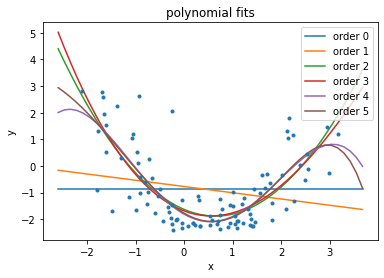

In [32]:
def plot_fitted_polynomials(x, y, beta_hat):
  """ Plot polynomials of different orders

  Args:
    x (ndarray): input vector of shape (n_samples)
    y (ndarray): vector of measurements of shape (n_samples)
    theta_hat (dict): polynomial regression weights for different orders
  """

  x_grid = np.linspace(x.min() - .5, x.max() + .5)

  plt.figure()

  for order in range(0, max_order + 1):
    X_design = make_design_matrix(x_grid, order)
    plt.plot(x_grid, X_design @ beta_hat[order]);

  plt.ylabel('y')
  plt.xlabel('x')
  plt.plot(x, y, 'C0.');
  plt.legend([f'order {o}' for o in range(max_order + 1)], loc=1)
  plt.title('polynomial fits')
  plt.show()

plot_fitted_polynomials(x, y, beta_hats)

## Model Comparison: Evaluating fit quality
We end by learning how to choose between these various models.

As with linear regression, we can compute mean squared error (MSE) to get a sense of how well the model fits the data. 

We compute MSE as:

$$ MSE = \frac 1 N ||y - \hat y||^2 = \sum_{i=1}^N (y_i - \hat y_i)^2 $$

where the predicted values for each model are given by $ \hat y = X \hat \beta$. 

*Which model (i.e. which polynomial order) do you think will have the best MSE?*

[Text(0.5, 1.0, 'Comparing Polynomial Fits'),
 Text(0.5, 0, 'Polynomial order'),
 Text(0, 0.5, 'MSE')]

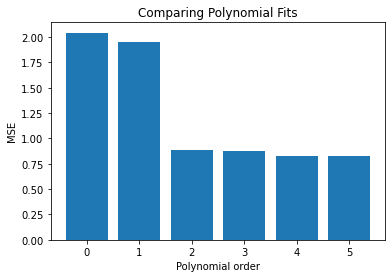

In [33]:
mse_list = []
order_list = list(range(max_order + 1))

for order in order_list:

  X_design = make_design_matrix(x, order)

  # Get prediction for the polynomial regression model of this order
  y_hat = X_design @ beta_hats[order]

  # Compute the residuals
  residuals = y - y_hat

  # Compute the MSE
  mse = np.mean(residuals ** 2)

  mse_list.append(mse)

fig, ax = plt.subplots()
ax.bar(order_list, mse_list)
ax.set(title='Comparing Polynomial Fits', xlabel='Polynomial order', ylabel='MSE')

### Akaike's Information Criterion (AIC)
In order to choose the best model for a given problem, we can ask how likely the data is under a given model. We want to choose a model that assigns high probability to the data. A commonly used method for model selection that uses this approach is **Akaike’s Information Criterion (AIC)**.

Essentially, AIC estimates how much information would be lost if the model predictions were used instead of the true data (the relative information value of the model). We compute the AIC for each model and choose the model with the lowest AIC. Note that AIC only tells us relative qualities, not absolute - we do not know from AIC how good our model is independent of others.

AIC strives for a good tradeoff between overfitting and underfitting by taking into account the complexity of the model and the information lost. AIC is calculated as:

$$ AIC = 2K - 2 log(L)$$

where K is the number of parameters in your model and L is the likelihood that the model could have produced the output data.

Now we know what AIC is, we want to use it to pick between our polynomial regression models. We haven't been thinking in terms of likelihoods though - so how will we calculate L? 

There is a link between mean squared error and the likelihood estimates for linear regression models that we can take advantage of. 

*Derivation time!*

We start with our formula for AIC from above:

$$ AIC = 2k - 2 log L $$

For a model with normal errors, we can use the log likelihood of the normal distribution:

$$ \log L = -\frac{n}{2} \log(2 \pi) -\frac{n}{2}log(\sigma^2) - \sum_i^n \frac{1}{2 \sigma^2} (y_i - \tilde y_i)^2$$

We can drop the first and last terms as both are constants and we're only assessing relative information with AIC. Once we drop those terms and incorporate into the AIC formula we get:

$$AIC = 2k + nlog(\sigma^2)$$

We can replace $\sigma^2$ with the computation for variance (the sum of squared errors divided by number of samples). Thus, we end up with the following formula for AIC for linear and polynomial regression:

$$ AIC = 2K + n log(\frac{SSE}{n})$$

where k is the number of parameters, n is the number of samples, and SSE is the summed squared error.

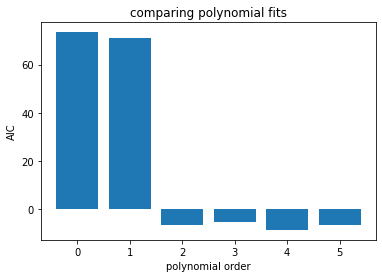

In [34]:
AIC_list = []
order_list = list(range(max_order + 1))

for order in order_list:

  # Compute predictions for this model
  X_design = make_design_matrix(x, order)
  y_hat = np.dot(X_design, beta_hats[order])

  # Compute SSE
  residuals = y - y_hat
  sse = np.sum(residuals ** 2)

  # Get K
  K = len(beta_hats[order])

  # Compute AIC
  AIC = 2 * K + n_subjects * np.log(sse / n_subjects)

  AIC_list.append(AIC)

plt.bar(order_list, AIC_list)
plt.ylabel('AIC')
plt.xlabel('polynomial order')
plt.title('comparing polynomial fits')
plt.show()

## Appendix: Least Squares Optimization Derivation

We will outline here the derivation of the least squares solution.

We first set the derivative of the error expression with respect to $\theta$ equal to zero, 

\begin{align}
\frac{d}{d\beta}\frac{1}{N}\sum_{i=1}^N(y_i - \beta x_i)^2 = 0 \\
\frac{1}{N}\sum_{i=1}^N-2x_i(y_i - \beta x_i) = 0
\end{align}

where we used the chain rule. Now solving for $\theta$, we obtain an optimal value of:

\begin{align}
\hat\beta = \frac{\sum_{i=1}^N x_i y_i}{\sum_{i=1}^N x_i^2}
\end{align}

Which we can write in vector notation as:

\begin{align}
\hat\beta = \frac{\vec{x}^\top \vec{y}}{\vec{x}^\top \vec{x}}
\end{align}


This is known as solving the *normal equations*. For different ways of obtaining the solution, see the notes on [Least Squares Optimization](https://www.cns.nyu.edu/~eero/NOTES/leastSquares.pdf) by Eero Simoncelli.